# Importing Dependencies


In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Reading the data


In [135]:
df = pd.read_csv("dataFiles/IBM.csv", parse_dates=['Date'], index_col='Date')
df = df.tail(7000)
df = df.sort_index()

# df = df[['Close','Open','Date']]
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,LogReturn
Date,,,,,,,,
1997-07-31 00:00:00-04:00,26.173909,26.389714,25.896448,26.081423,7200873,0.0,0.0,NaN
1997-08-01 00:00:00-04:00,26.019772,26.127673,25.480262,25.834797,8371766,0.0,0.0,-0.009501
1997-08-04 00:00:00-04:00,25.788542,26.266393,25.726884,26.204735,6362609,0.0,0.0,0.014218
1997-08-05 00:00:00-04:00,26.266401,26.620936,26.266401,26.266401,5620158,0.0,0.0,0.002350
1997-08-06 00:00:00-04:00,26.250989,26.990889,26.096845,26.605524,8707113,0.0,0.0,0.012828


# Plots

<Axes: xlabel='Date', ylabel='Close'>

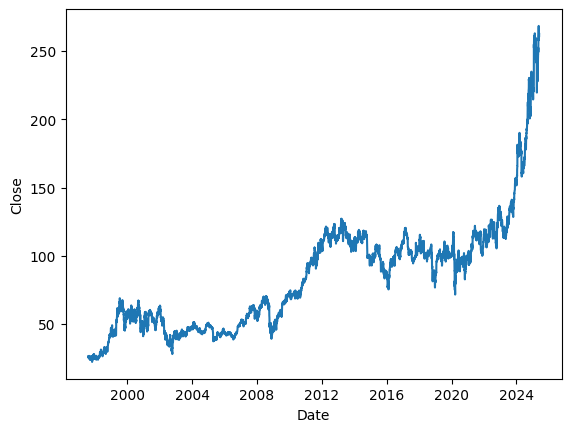

In [136]:
sns.lineplot(data = df, x = "Date", y = "Close")

<Axes: xlabel='Date', ylabel='LogReturn'>

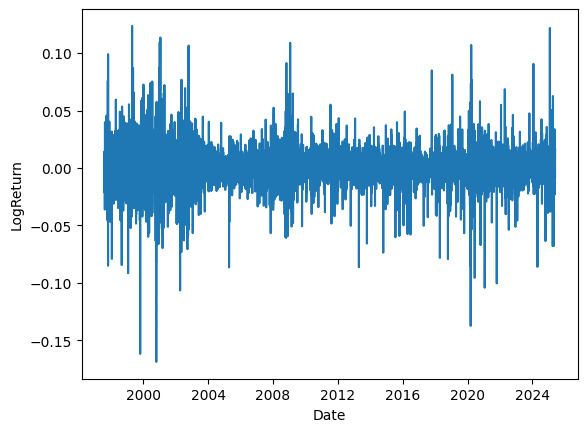

In [137]:
sns.lineplot(data = df, x = "Date", y = "LogReturn")

# ADF Test

In [128]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['LogReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -19.40995809197387
p-value: 0.0
Used lags: 21
Number of observations: 6977
Critical Values:
   1%: -3.4312876103679093
   5%: -2.8619543482404506
   10%: -2.5669905536202626


In [129]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Close'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: 1.9738012517143586
p-value: 0.9986379261803221
Used lags: 27
Number of observations: 6972
Critical Values:
   1%: -3.431288283027058
   5%: -2.861954645454677
   10%: -2.5669907118326596


# ACF and PACF plots

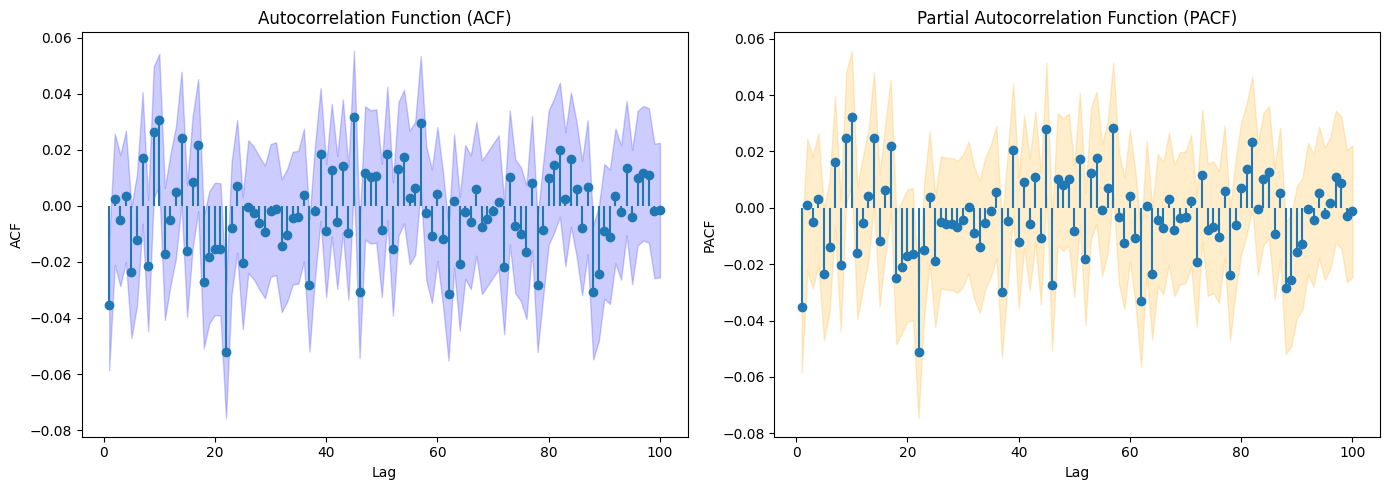

In [130]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Series without NaNs
series = df['LogReturn'].dropna()

# Compute ACF and PACF with confidence intervals
acf_vals, acf_confint = acf(series, nlags=100, alpha=0.05)  # 95% CI
pacf_vals, pacf_confint = pacf(series, nlags=100, method='ywm', alpha=0.05)

# Exclude lag 0
lags = np.arange(1, 101)
acf_vals = acf_vals[1:]
acf_confint = acf_confint[1:]
pacf_vals = pacf_vals[1:]
pacf_confint = pacf_confint[1:]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
axes[0].stem(lags, acf_vals, basefmt=" ")
axes[0].fill_between(lags, acf_confint[:, 0] - acf_vals + acf_vals, acf_confint[:, 1] - acf_vals + acf_vals, 
                     color='blue', alpha=0.2)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# PACF plot
axes[1].stem(lags, pacf_vals, basefmt=" ")
axes[1].fill_between(lags, pacf_confint[:, 0] - pacf_vals + pacf_vals, pacf_confint[:, 1] - pacf_vals + pacf_vals, 
                     color='orange', alpha=0.2)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()


# GARCH Model

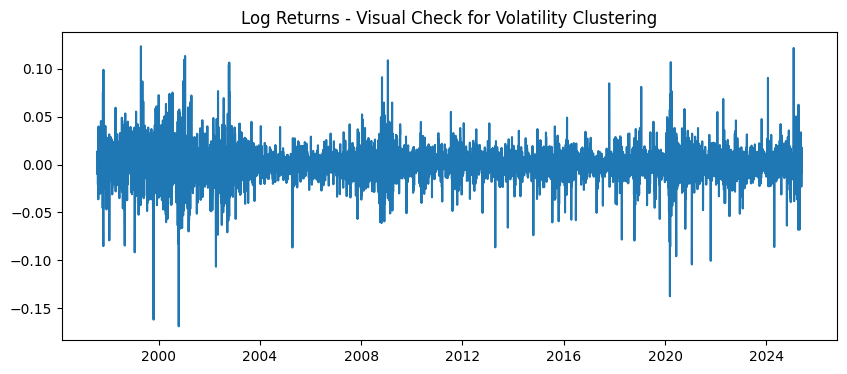

ARCH LM test p-value: 7.969374354773573e-92


/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002934. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be 

RMSE: 19.8940
MAE : 14.9726
R²   : 0.7693


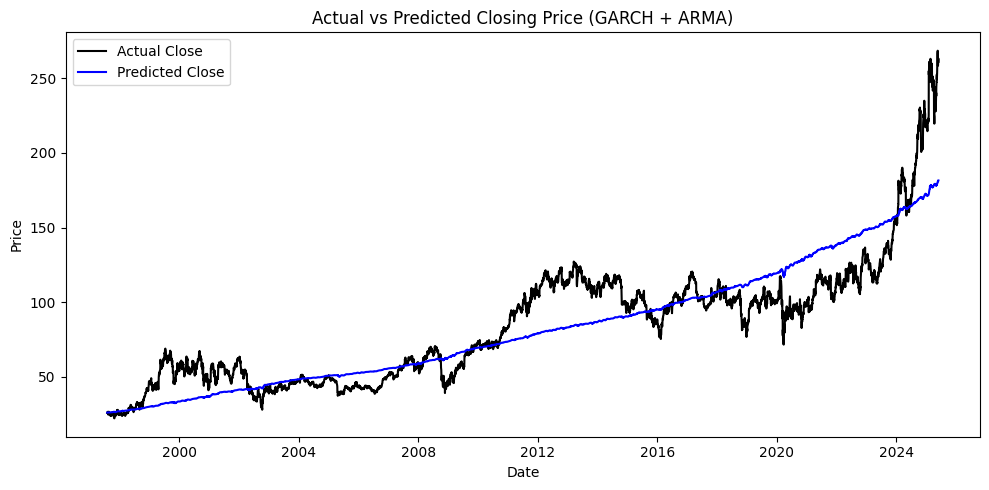

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import het_arch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Drop NaNs
log_ret = df['LogReturn'].dropna()

# --- Visual inspection of volatility clustering ---
plt.figure(figsize=(10,4))
plt.plot(log_ret)
plt.title('Log Returns - Visual Check for Volatility Clustering')
plt.show()

# --- ARCH LM test ---
arch_test = het_arch(log_ret.dropna())
print("ARCH LM test p-value:", arch_test[1])

# --- Fit GARCH(p, q) model ---
garch_model = arch_model(log_ret, vol='GARCH', p=3, q=3)
garch_res = garch_model.fit(disp='off')
df['volatility'] = garch_res.conditional_volatility
df['standardized_ret'] = log_ret / df['volatility']

# --- Fit ARMA model on standardized series ---
arma_model = ARIMA(df['standardized_ret'].dropna(), order=(10, 0, 10))  # adjust p, q
arma_res = arma_model.fit()
arma_pred = arma_res.predict(start=df['standardized_ret'].dropna().index[0], end=df['standardized_ret'].dropna().index[-1])

# --- Reconstruct returns and closing price ---
recon_ret = arma_pred * df.loc[arma_pred.index, 'volatility']
recon_log_close = np.log(df['Close'].iloc[0]) + recon_ret.cumsum()
recon_close = np.exp(recon_log_close)

# --- Evaluation ---
true_close = df.loc[recon_close.index, 'Close']
rmse = np.sqrt(mean_squared_error(true_close, recon_close))
mae = mean_absolute_error(true_close, recon_close)
r2 = r2_score(true_close, recon_close)

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²   : {r2:.4f}")

# --- Plotting predicted vs actual ---
plt.figure(figsize=(10, 5))
plt.plot(true_close, label="Actual Close", color='black')
plt.plot(recon_close, label="Predicted Close",  color ='blue')
plt.title("Actual vs Predicted Closing Price (GARCH + ARMA)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()
